# Single-cell RNA-seq imputation using DeepImpute

Here is a comprehensive tutorial to understand the functionnalities of DeepImpute.

In [2]:
import sys
sys.path.append('/Users/juank/Desktop/BCOM/Proyecto/deepimpute')

from deepimpute.multinet import MultiNet
from deepimpute.util import score_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import magic

# Load dataset using pandas
data = pd.read_csv('test.csv',index_col=0)
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 500 cells and 3000 genes


In [3]:
def mean_squared_error_metric(true_values, imputed_values):
    return mean_squared_error(true_values, imputed_values)

In [4]:
df = pd.read_csv('/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/linnarsson.csv',index_col=0)
df

,1772071015_C02,1772071017_G12,1772071017_A05,1772071014_B06,1772067065_H06,1772071017_E02,1772067065_B07,1772067060_B09,1772071014_E04,1772071015_D04,...,1772067076_E04,1772066097_C06,1772067057_D12,1772066100_A05,1772071015_A11,1772071015_C09,1772062128_F10,1772071017_H06,1772071014_A12,1772063077_H05
Atp1b2,9,5,8,6,7,9,0,3,6,4,...,2,0,2,1,2,7,1,10,3,1
Sub1,28,41,57,33,30,13,27,17,23,31,...,49,26,47,16,18,27,44,5,23,18
Ptprf,0,0,4,1,5,2,0,4,0,10,...,1,1,3,0,1,7,7,0,2,0
Cers5,0,0,7,1,0,1,2,0,0,0,...,3,0,13,2,0,2,3,3,4,1
Rit2,2,6,3,1,12,2,2,2,10,7,...,2,9,2,0,6,3,5,11,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eif1ax,1,1,2,1,1,1,0,0,0,1,...,2,5,4,2,0,0,1,1,3,3
Rbbp7,1,2,4,4,6,4,6,8,3,4,...,1,4,4,0,2,2,0,2,1,0
Trappc2,1,1,2,1,2,0,0,0,1,1,...,5,6,5,2,1,2,1,0,4,0
Rab9,7,1,1,3,0,0,2,0,0,0,...,1,2,3,2,0,6,2,2,2,3


In [5]:
data = pd.read_csv('test.csv', index_col=0)
data

,ENSG00000177954,ENSG00000197756,ENSG00000231500,ENSG00000140988,ENSG00000105372,ENSG00000198712,ENSG00000109475,ENSG00000112306,ENSG00000137818,ENSG00000115268,...,ENSG00000269858,ENSG00000182087,ENSG00000160214,ENSG00000166411,ENSG00000186153,ENSG00000089351,ENSG00000108433,ENSG00000206053,ENSG00000137806,ENSG00000197766
AATTGTGACTACGA-1,826.0,674.0,694.0,809.0,771.0,796.0,755.0,684.0,597.0,516.0,...,3.0,2.0,3.0,2.0,2.0,0.0,0.0,1.0,5.0,4.0
TGACACGATTCGTT-1,617.0,618.0,594.0,703.0,671.0,473.0,549.0,523.0,476.0,527.0,...,2.0,1.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,3.0
TGTCAGGATTGTCT-1,525.0,550.0,540.0,546.0,615.0,565.0,263.0,422.0,449.0,518.0,...,2.0,1.0,0.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0
TAAGTAACGTTCTT-1,514.0,474.0,361.0,331.0,447.0,279.0,188.0,332.0,379.0,380.0,...,1.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,3.0,1.0
TCCTAAACTTCATC-1,444.0,507.0,509.0,566.0,520.0,246.0,352.0,413.0,381.0,481.0,...,1.0,2.0,0.0,5.0,4.0,0.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAATGGGATGCCTC-1,169.0,149.0,161.0,203.0,178.0,155.0,128.0,150.0,124.0,120.0,...,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
TAAAGTTGTTACCT-1,202.0,216.0,177.0,253.0,257.0,34.0,38.0,188.0,137.0,189.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
AGCGAACTCTAGTG-1,160.0,154.0,184.0,253.0,150.0,190.0,101.0,191.0,158.0,127.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
GTCACCTGTTACCT-1,140.0,133.0,179.0,246.0,197.0,89.0,88.0,150.0,153.0,132.0,...,2.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,3.0,1.0


## Create a DeepImpute multinet

In [7]:
# Using default parameters
multinet = MultiNet() 

Using all the cores (12)


In [8]:
# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

## Fit the networks

In [10]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 500 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATTGTGACTACGA-1            826.0            674.0            694.0
TGACACGATTCGTT-1            617.0            618.0            594.0
TGTCAGGATTGTCT-1            525.0            550.0            540.0
3072 genes selected for imputation
Net 0: 639 predictors, 512 targets
Net 1: 593 predictors, 512 targets
Net 2: 591 predictors, 512 targets
Net 3: 594 predictors, 512 targets
Net 4: 555 predictors, 512 targets
Net 5: 631 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 500 cells
Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 31.1179 - val_loss: 25.7745
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.2374 - val_loss: 20.7030
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

Stopped fitting after 56 epochs
Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp6xyn4kuv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [11]:
# Using 80% of the data
multinet.fit(data,cell_subset=0.5)

Input dataset is 500 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATTGTGACTACGA-1            826.0            674.0            694.0
TGACACGATTCGTT-1            617.0            618.0            594.0
TGTCAGGATTGTCT-1            525.0            550.0            540.0
3072 genes selected for imputation
Net 0: 847 predictors, 512 targets
Net 1: 839 predictors, 512 targets
Net 2: 842 predictors, 512 targets
Net 3: 840 predictors, 512 targets
Net 4: 820 predictors, 512 targets
Net 5: 766 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 250 cells
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 30.1755 - val_loss: 25.3924
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.8187 - val_loss: 22.3659
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss:

Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp6xyn4kuv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [12]:
# Using 200 cells (randomly selected)
multinet.fit(data,cell_subset=200)

Input dataset is 500 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATTGTGACTACGA-1            826.0            674.0            694.0
TGACACGATTCGTT-1            617.0            618.0            594.0
TGTCAGGATTGTCT-1            525.0            550.0            540.0
3072 genes selected for imputation
Net 0: 907 predictors, 512 targets
Net 1: 912 predictors, 512 targets
Net 2: 905 predictors, 512 targets
Net 3: 923 predictors, 512 targets
Net 4: 898 predictors, 512 targets
Net 5: 848 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 200 cells
Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 29.3940 - val_loss: 24.4668
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.6240 - val_loss: 22.0044
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp6xyn4kuv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [13]:
# Custom fit
trainingData = data.iloc[100:250,:]
multinet.fit(trainingData)

Input dataset is 150 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATACCCTGGGACA-1            271.0            262.0            231.0
GGCGCATGCCTAAG-1            173.0            390.0            358.0
CGCACTTGAACCAC-1            367.0            406.0            354.0
3072 genes selected for imputation
Net 0: 1252 predictors, 512 targets
Net 1: 1263 predictors, 512 targets
Net 2: 1250 predictors, 512 targets
Net 3: 1273 predictors, 512 targets
Net 4: 1253 predictors, 512 targets
Net 5: 1251 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 150 cells
Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 29.0828 - val_loss: 26.0299
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.4024 - val_loss: 23.3108
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp6xyn4kuv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


## Imputation

The imputation can be done on any dataset as long as the gene labels are the same

In [15]:
imputedData = multinet.predict(data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Filling zeros


In [16]:
imputedData

,ENSG00000177954,ENSG00000197756,ENSG00000231500,ENSG00000140988,ENSG00000105372,ENSG00000198712,ENSG00000109475,ENSG00000112306,ENSG00000137818,ENSG00000115268,...,ENSG00000269858,ENSG00000182087,ENSG00000160214,ENSG00000166411,ENSG00000186153,ENSG00000089351,ENSG00000108433,ENSG00000206053,ENSG00000137806,ENSG00000197766
AATTGTGACTACGA-1,826.0,674.0,694.0,809.0,771.0,796.0,755.0,684.0,597.0,516.0,...,3.000000,2.000000,3.000000,2.000000,2.000000,1.434801,1.152548,1.000000,5.000000,4.0
TGACACGATTCGTT-1,617.0,618.0,594.0,703.0,671.0,473.0,549.0,523.0,476.0,527.0,...,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,4.000000,2.000000,3.0
TGTCAGGATTGTCT-1,525.0,550.0,540.0,546.0,615.0,565.0,263.0,422.0,449.0,518.0,...,2.000000,1.000000,2.280760,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.0
TAAGTAACGTTCTT-1,514.0,474.0,361.0,331.0,447.0,279.0,188.0,332.0,379.0,380.0,...,1.000000,2.000000,1.820684,3.000000,3.000000,1.161829,1.000000,1.041906,3.000000,1.0
TCCTAAACTTCATC-1,444.0,507.0,509.0,566.0,520.0,246.0,352.0,413.0,381.0,481.0,...,1.000000,2.000000,2.361943,5.000000,4.000000,0.912386,3.000000,4.000000,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAATGGGATGCCTC-1,169.0,149.0,161.0,203.0,178.0,155.0,128.0,150.0,124.0,120.0,...,1.410280,3.000000,1.000000,1.000000,0.670106,0.945319,1.052117,1.137351,1.781484,1.0
TAAAGTTGTTACCT-1,202.0,216.0,177.0,253.0,257.0,34.0,38.0,188.0,137.0,189.0,...,1.000000,1.389475,1.000000,1.506918,1.000000,1.000000,1.357453,1.000000,2.000000,1.0
AGCGAACTCTAGTG-1,160.0,154.0,184.0,253.0,150.0,190.0,101.0,191.0,158.0,127.0,...,1.064641,1.235121,1.469747,1.000000,1.672297,0.831589,1.300530,1.000000,2.000000,2.0
GTCACCTGTTACCT-1,140.0,133.0,179.0,246.0,197.0,89.0,88.0,150.0,153.0,132.0,...,2.000000,1.000000,1.000000,3.000000,1.000000,1.061516,1.468383,1.253806,3.000000,1.0


In [17]:
# Magic
magic_operator = magic.MAGIC()
data_imputed = magic_operator.fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 500 cells and 3000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 5.02 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 5.09 seconds.
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 5.13 seconds.


In [18]:
data_imputed

,ENSG00000177954,ENSG00000197756,ENSG00000231500,ENSG00000140988,ENSG00000105372,ENSG00000198712,ENSG00000109475,ENSG00000112306,ENSG00000137818,ENSG00000115268,...,ENSG00000269858,ENSG00000182087,ENSG00000160214,ENSG00000166411,ENSG00000186153,ENSG00000089351,ENSG00000108433,ENSG00000206053,ENSG00000137806,ENSG00000197766
AATTGTGACTACGA-1,533.744603,508.689526,472.636093,468.676693,489.343576,384.848736,383.917887,423.540550,379.014636,384.083830,...,1.359444,1.505304,1.262457,1.506206,1.298592,1.215353,1.496776,1.472611,1.553145,1.454917
TGACACGATTCGTT-1,532.045042,508.958934,472.096679,468.601854,489.164351,381.498916,381.507092,423.142889,379.462738,385.078669,...,1.359540,1.507672,1.250838,1.532559,1.308919,1.221804,1.517166,1.489048,1.569469,1.448407
TGTCAGGATTGTCT-1,518.937415,500.394617,465.871105,461.151556,480.061782,363.636764,357.013223,413.927431,371.376068,379.598053,...,1.371726,1.518376,1.232709,1.537013,1.327417,1.223808,1.554493,1.444468,1.534470,1.353327
TAAGTAACGTTCTT-1,461.575775,457.780316,413.398829,413.899274,428.355107,303.965866,288.030670,365.495844,333.416392,344.677563,...,1.376985,1.552681,1.424065,1.413422,1.375220,1.051713,1.515564,1.295334,1.441051,1.208147
TCCTAAACTTCATC-1,493.355397,483.524345,446.086666,441.319517,456.680458,325.549556,318.655209,393.878446,354.414583,363.927003,...,1.354848,1.545835,1.329941,1.463977,1.359604,1.166183,1.525062,1.365684,1.464658,1.257233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAATGGGATGCCTC-1,180.753823,173.408490,171.368223,213.412217,199.339850,159.310497,123.247462,162.330216,150.395340,145.015316,...,0.762063,1.052577,1.043163,0.995442,0.889968,0.561633,1.077451,0.745883,0.911034,0.719031
TAAAGTTGTTACCT-1,201.526665,211.882963,213.337877,256.540305,234.413529,89.091094,53.157417,185.183126,180.134622,179.059567,...,0.943430,0.960421,1.339413,1.080569,1.093544,0.719834,0.923669,0.820120,1.112237,0.737986
AGCGAACTCTAGTG-1,196.516052,178.154862,183.737408,223.463157,205.382741,170.449391,142.891002,170.939533,160.981829,152.512711,...,0.756173,1.009670,0.925985,0.906024,0.770780,0.590980,0.975407,0.760057,0.972667,0.780724
GTCACCTGTTACCT-1,171.693314,166.760515,173.627294,226.356299,207.921984,115.140446,84.809670,163.678923,155.791590,149.932067,...,0.804989,0.953498,1.169400,1.132583,0.914251,0.669706,0.981772,0.894106,1.069816,0.705367


## Visualization

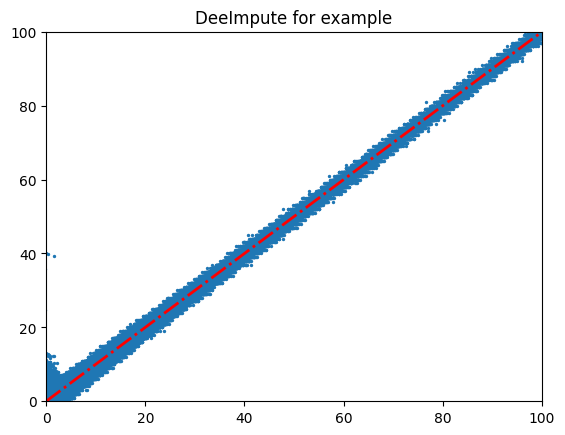

In [20]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.title("DeeImpute for example")

plt.show()


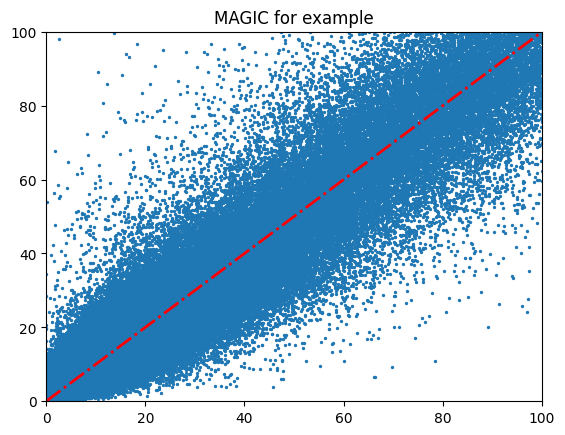

In [21]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,data_imputed.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.title("MAGIC for example")

plt.show()

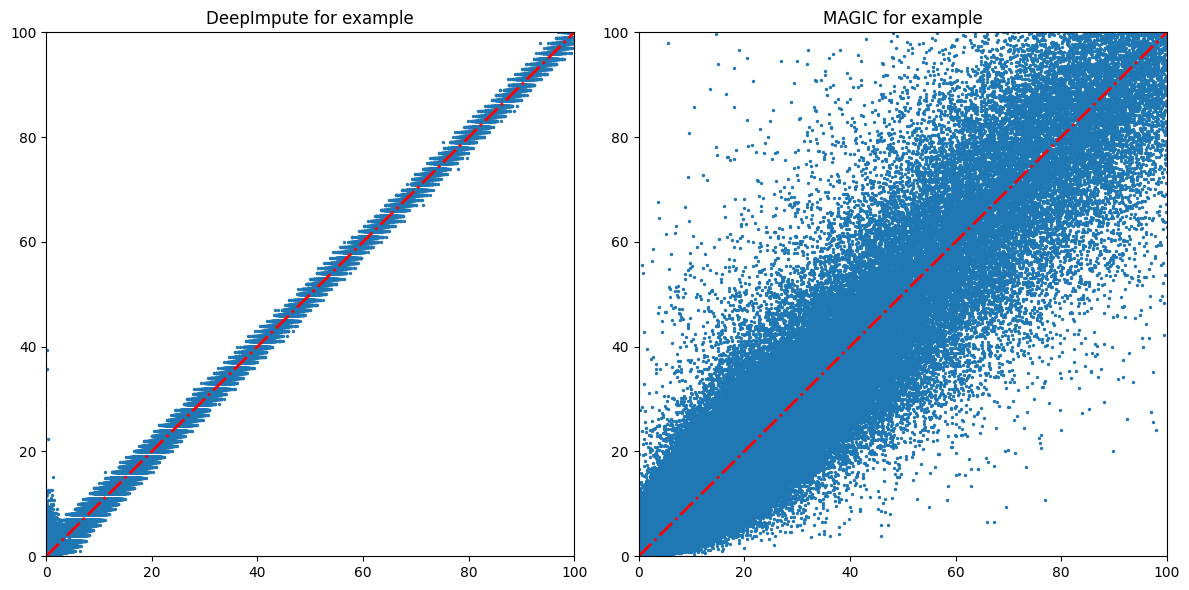

In [22]:
limits = [0, 100]

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica para DeepImpute
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax1.scatter(data.values.flatten() + jitter, imputedData.values.flatten(), s=2)
ax1.plot(limits, limits, 'r-.', linewidth=2)
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("DeepImpute for example")

# Gráfica para MAGIC
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax2.scatter(data.values.flatten() + jitter, data_imputed.values.flatten(), s=2)
ax2.plot(limits, limits, 'r-.', linewidth=2)
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("MAGIC for example")

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [23]:
print(score_model(multinet, data, mean_squared_error_metric, cols=None))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Filling zeros
8.5952815756854


## Scoring
Display training metrics (MSE and Pearson's correlation on the test data)

In [25]:
multinet.test_metrics

{'correlation': 0.8937666326656509, 'MSE': 0.19162830941307124}

In [26]:
from scipy.stats import pearsonr

np.random.seed(42)
mask = np.random.rand(*data.shape) < 0.1  # Mascara aleatoria, 10% de los datos enmascarados

data_masked = data.copy()
data_masked[mask] = 0

# Realiza la imputación sobre los datos enmascarados
data_imputed = magic_operator.fit_transform(data_masked)

# Solo comparar valores que fueron enmascarados (donde tenemos datos originales para comparar)
original_values = data[mask]
imputed_values = data_imputed[mask]

# Correlación de Pearson
# pearson_corr = pearsonr(original_values, imputed_values)[0]

# MSE
mse = mean_squared_error(original_values, imputed_values)

# print(f"Correlación de Pearson: {pearson_corr}")
print(f"MSE: {mse}")

Calculating MAGIC...
  Running MAGIC on 500 cells and 3000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4.78 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 4.86 seconds.
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 4.88 seconds.
MSE: 48.33919499581608


# neuron9k Gene

In [28]:
# Ruta a la carpeta que contiene los archivos 'genes.tsv', 'barcodes.tsv' y 'matrix.mtx'
data_dir = '/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/neuron9k'

# Leer los datos usando scanpy
adata = sc.read_10x_mtx(data_dir, var_names='gene_symbols', cache=True)

# Convertir AnnData a DataFrame de Pandas
# Las filas son células y las columnas son genes
data = adata.to_df()
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 9128 cells and 27998 genes


In [29]:
data

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGACGCTTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
AAACCTGAGATCTGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGTCATCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACCTGCAAGAGTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
AAACCTGCACACATGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCTTGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
TTTGTCAGTGATAAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TTTGTCATCCTTGACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0
TTTGTCATCGGCTACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Using default parameters
multinet = MultiNet() 

# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

Using all the cores (12)


In [31]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 9128 cells (rows) and 27998 genes (columns)
First 3 rows and columns:
                    Xkr4  Gm1992  Gm37381
AAACCTGAGACGCTTT-1   0.0     0.0      0.0
AAACCTGAGATCTGCT-1   0.0     0.0      0.0
AAACCTGAGGTCATCT-1   0.0     0.0      0.0
3072 genes selected for imputation
Net 0: 548 predictors, 512 targets
Net 1: 546 predictors, 512 targets
Net 2: 592 predictors, 512 targets
Net 3: 583 predictors, 512 targets
Net 4: 544 predictors, 512 targets
Net 5: 576 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 9128 cells
Epoch 1/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9190 - val_loss: 0.8422
Epoch 2/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3106 - val_loss: 0.6789
Epoch 3/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0302 - val_loss: 0.6121
Epoch 4/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8961

Stopped fitting after 57 epochs
Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp6xyn4kuv
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [32]:
imputedData = multinet.predict(data)

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Filling zeros


In [33]:
# Magic impute
magic_operator = magic.MAGIC()
data_imputed = magic_operator.fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 9128 cells and 27998 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/anaconda3/lib/python3.11/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 14.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.88 seconds.
    Calculating affinities...
    Calculated affinities in 3.38 seconds.
  Calculated graph and diffusion operator in 22.16 seconds.
  Running MAGIC with `solver='exact'` on 27998-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 22.82 seconds.
Calculated MAGIC in 45.15 seconds.


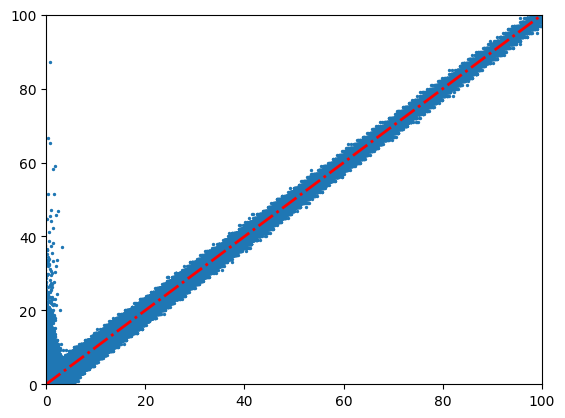

In [34]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

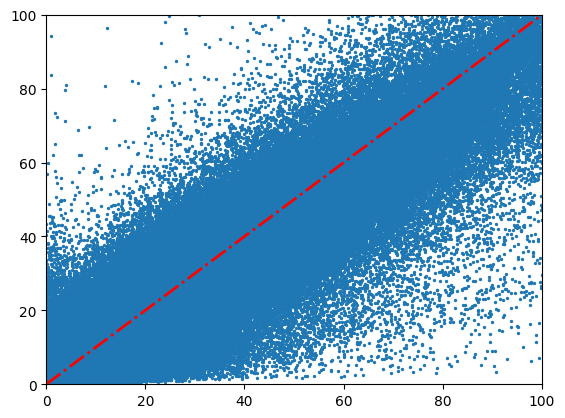

In [35]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,data_imputed.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

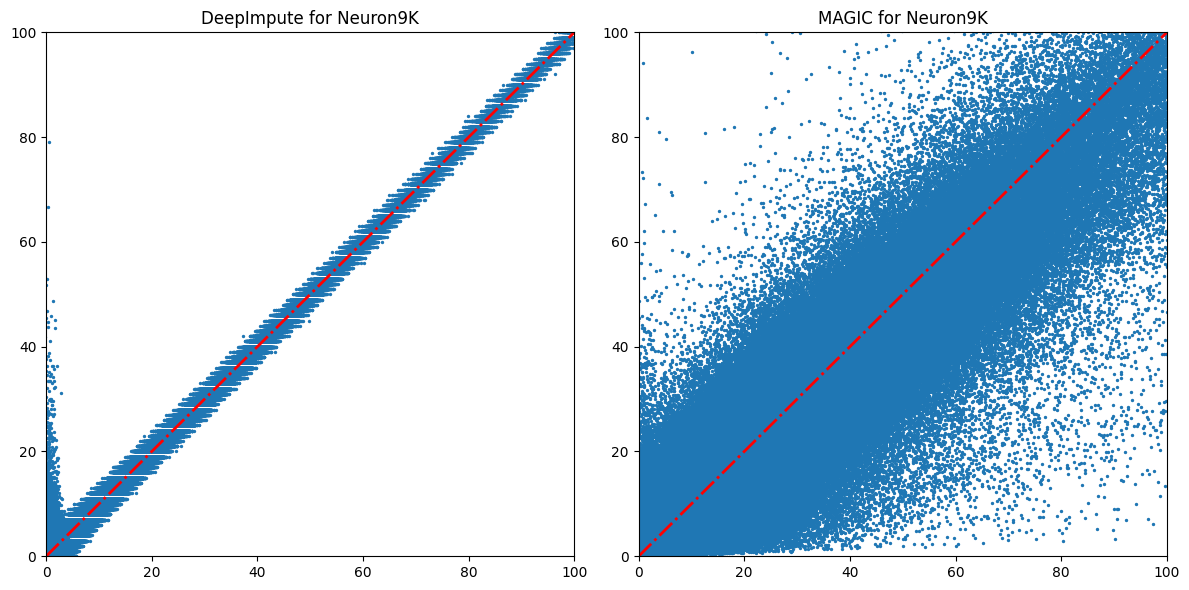

In [36]:
limits = [0, 100]

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica para DeepImpute
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax1.scatter(data.values.flatten() + jitter, imputedData.values.flatten(), s=2)
ax1.plot(limits, limits, 'r-.', linewidth=2)
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("DeepImpute for Neuron9K")

# Gráfica para MAGIC
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax2.scatter(data.values.flatten() + jitter, data_imputed.values.flatten(), s=2)
ax2.plot(limits, limits, 'r-.', linewidth=2)
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("MAGIC for Neuron9K")

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [37]:
multinet.test_metrics

{'correlation': 0.8799399664124952, 'MSE': 0.11585149661161577}

In [38]:
print(score_model(multinet, data, mean_squared_error_metric, cols=None))

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Filling zeros
2.240173


# 293T Gene

In [40]:
# Ruta a la carpeta que contiene los archivos 'genes.tsv', 'barcodes.tsv' y 'matrix.mtx'
# data_dir = '/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/293T'
data_dir = '/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/filtered_matrices_mex 4/hg19'


# Leer los datos usando scanpy
adata = sc.read_10x_mtx(data_dir, var_names='gene_symbols', cache=True)

# Convertir AnnData a DataFrame de Pandas
# Las filas son células y las columnas son genes
data = adata.to_df()
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 2885 cells and 32738 genes


In [41]:
data

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACACTGGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATACAGACTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGACCAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGGCGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGGGACTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTACTAGCCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGACTGAAAACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGACTGGTGCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Using default parameters
multinet = MultiNet() 

# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 32,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

Using all the cores (12)


In [43]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 2885 cells (rows) and 32738 genes (columns)
First 3 rows and columns:
                  MIR1302-10  FAM138A  OR4F5
AAACATACACTGGT-1         0.0      0.0    0.0
AAACATACAGACTC-1         0.0      0.0    0.0
AAACATTGACCAAC-1         0.0      0.0    0.0
3584 genes selected for imputation
Net 0: 396 predictors, 512 targets
Net 1: 417 predictors, 512 targets
Net 2: 417 predictors, 512 targets
Net 3: 490 predictors, 512 targets
Net 4: 421 predictors, 512 targets
Net 5: 474 predictors, 512 targets
Net 6: 466 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 2885 cells
Epoch 1/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.1733 - val_loss: 2.3863
Epoch 2/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7948 - val_loss: 1.2656
Epoch 3/200
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6290 - val_loss: 1.0741
Epoch 4/200
86/86 ━━━━━━━

Stopped fitting after 69 epochs
Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp6xyn4kuv
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [44]:
imputedData = multinet.predict(data)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Filling zeros


In [45]:
# Magic impute
magic_operator = magic.MAGIC()
data_imputed = magic_operator.fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 2885 cells and 32738 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/anaconda3/lib/python3.11/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 9.26 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.40 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 10.00 seconds.
  Running MAGIC with `solver='exact'` on 32738-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 2.19 seconds.
Calculated MAGIC in 12.25 seconds.


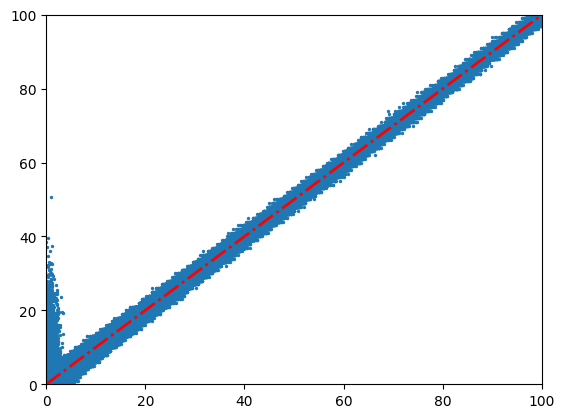

In [46]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

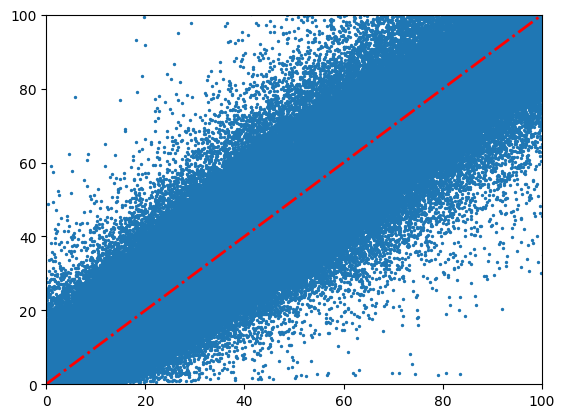

In [47]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,data_imputed.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

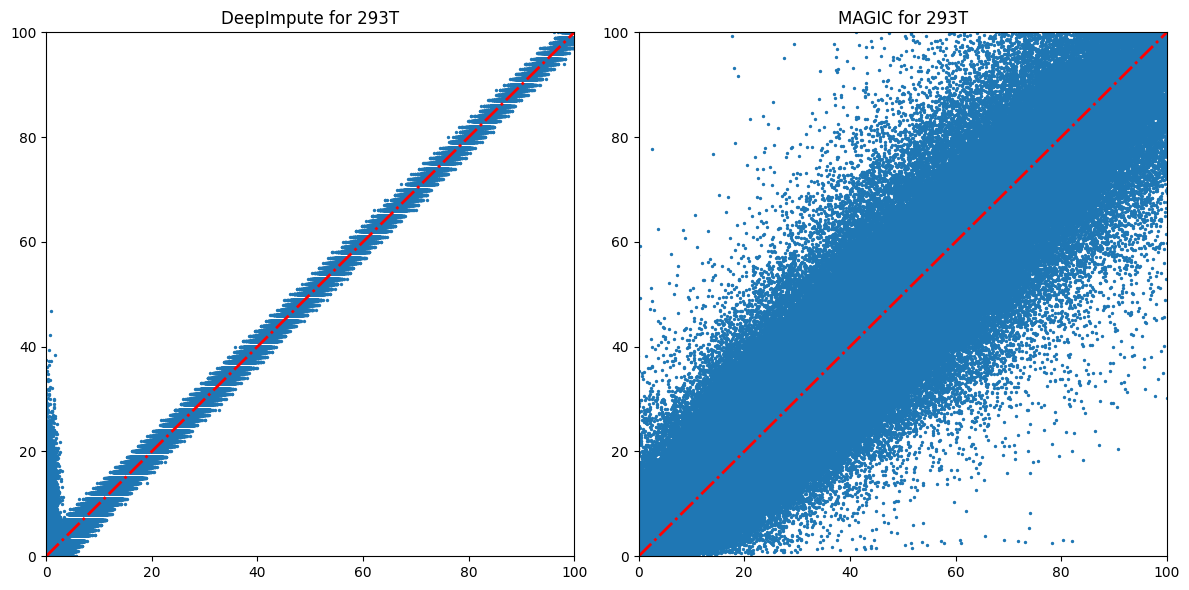

In [48]:
limits = [0, 100]

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica para DeepImpute
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax1.scatter(data.values.flatten() + jitter, imputedData.values.flatten(), s=2)
ax1.plot(limits, limits, 'r-.', linewidth=2)
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("DeepImpute for 293T")

# Gráfica para MAGIC
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax2.scatter(data.values.flatten() + jitter, data_imputed.values.flatten(), s=2)
ax2.plot(limits, limits, 'r-.', linewidth=2)
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("MAGIC for 293T")

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [49]:
multinet.test_metrics

{'correlation': 0.9084856517809917, 'MSE': 0.12690514356317634}

In [50]:
print(score_model(multinet, data, mean_squared_error_metric, cols=None))

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Filling zeros
2.824601


# Jurkat

In [52]:
# Ruta a la carpeta que contiene los archivos 'genes.tsv', 'barcodes.tsv' y 'matrix.mtx'
data_dir = '/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/jurkat'


# Leer los datos usando scanpy
adata = sc.read_10x_mtx(data_dir, var_names='gene_symbols', cache=True)

# Convertir AnnData a DataFrame de Pandas
# Las filas son células y las columnas son genes
data = adata.to_df()
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 3258 cells and 32738 genes


In [53]:
data

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACACTGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGACCACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCACTTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGGCGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTGAGAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTACTGGTATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGACTGAAGGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGACTGCTTATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGCTGTGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Using default parameters
multinet = MultiNet() 

# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 32,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

Using all the cores (12)


In [55]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 3258 cells (rows) and 32738 genes (columns)
First 3 rows and columns:
                  MIR1302-10  FAM138A  OR4F5
AAACATACACTGTG-1         0.0      0.0    0.0
AAACCGTGACCACA-1         0.0      0.0    0.0
AAACCGTGCACTTT-1         0.0      0.0    0.0
3072 genes selected for imputation
Net 0: 487 predictors, 512 targets
Net 1: 490 predictors, 512 targets
Net 2: 512 predictors, 512 targets
Net 3: 503 predictors, 512 targets
Net 4: 462 predictors, 512 targets
Net 5: 472 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 3258 cells
Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.8105 - val_loss: 2.1056
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7699 - val_loss: 1.1685
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6098 - val_loss: 1.0234
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2

Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp6xyn4kuv
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [56]:
imputedData = multinet.predict(data)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Filling zeros


In [57]:
# Magic impute
magic_operator = magic.MAGIC()
data_imputed = magic_operator.fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 3258 cells and 32738 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/anaconda3/lib/python3.11/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 11.44 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.49 seconds.
    Calculating affinities...
    Calculated affinities in 0.44 seconds.
  Calculated graph and diffusion operator in 12.40 seconds.
  Running MAGIC with `solver='exact'` on 32738-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 2.71 seconds.
Calculated MAGIC in 15.19 seconds.


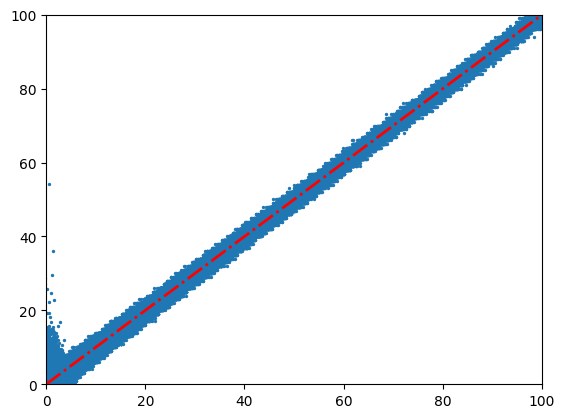

In [58]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

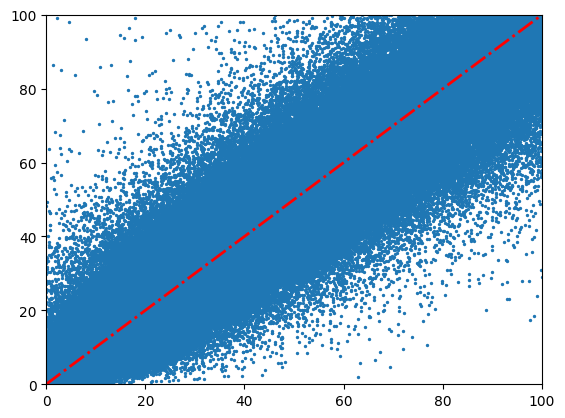

In [59]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,data_imputed.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

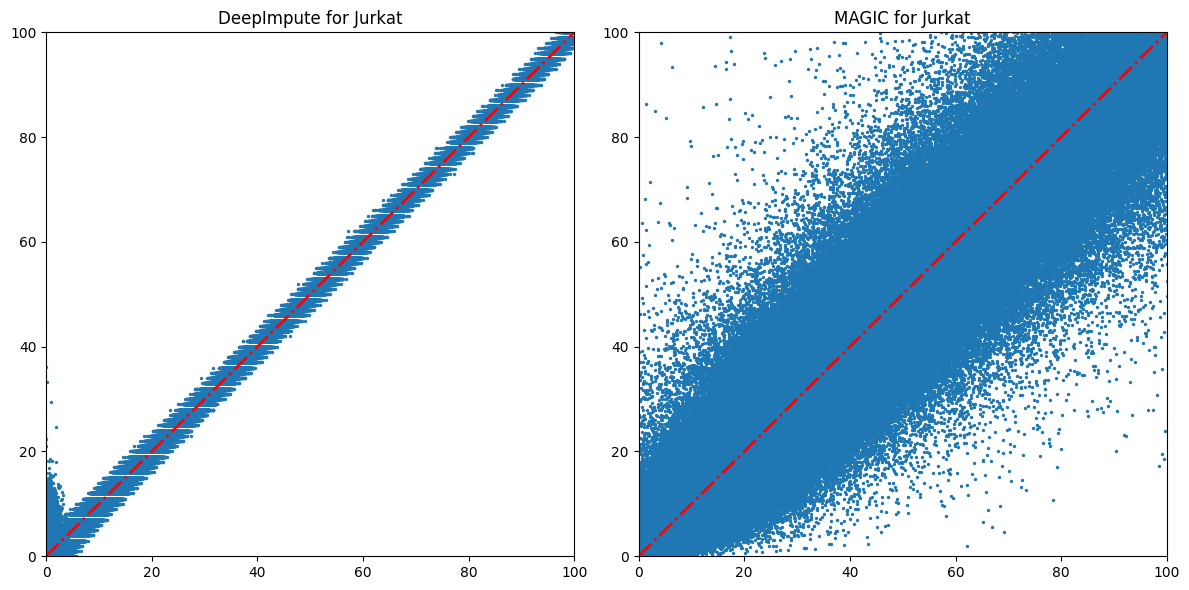

In [60]:
limits = [0, 100]

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica para DeepImpute
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax1.scatter(data.values.flatten() + jitter, imputedData.values.flatten(), s=2)
ax1.plot(limits, limits, 'r-.', linewidth=2)
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("DeepImpute for Jurkat")

# Gráfica para MAGIC
jitter = np.random.normal(0, 1, data.size)  # Añadir jittering para ver mejor la densidad de puntos
ax2.scatter(data.values.flatten() + jitter, data_imputed.values.flatten(), s=2)
ax2.plot(limits, limits, 'r-.', linewidth=2)
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("MAGIC for Jurkat")

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [61]:
multinet.test_metrics

{'correlation': 0.9166013118928668, 'MSE': 0.1318574104215727}

In [62]:
print(score_model(multinet, data, mean_squared_error_metric, cols=None))

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Filling zeros
3.0337615


# Mouse1M

In [ ]:
data_path = '/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/1M_neurons_filtered_gene_bc_matrices_h5.h5'

# Cargar los datos usando scanpy
adata = sc.read_10x_h5(data_path)

# Convertir AnnData a DataFrame de Pandas
# Las filas son células y las columnas son genes
data = adata.to_df()
print('Working on {} cells and {} genes'.format(*data.shape))

/opt/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
data

In [ ]:
# Using default parameters
multinet = MultiNet() 

# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

In [ ]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

In [ ]:
imputedData = multinet.predict(data)

In [ ]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

In [ ]:
multinet.test_metrics

In [ ]:
print(score_model(multinet, data, mean_squared_error_metric, cols=None))

# linnarsson

In [ ]:
data = pd.read_csv('/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/linnarsson.csv', index_col=0)
data

# Blakeley

In [ ]:
data = pd.read_csv('/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/blakeley.csv', index_col=0)
data

In [ ]:
# Using default parameters
multinet = MultiNet() 

# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 500,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

In [ ]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

In [ ]:
imputedData = multinet.predict(data)

In [ ]:
limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

In [ ]:
multinet.test_metrics

In [ ]:
print(score_model(multinet, data, mean_squared_error_metric, cols=None))